In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
#how to read
#fileObj = open('data/r76-80V-naitrig-100eV-goodchi.pkl', 'rb')
fileObj = open('../example_scripts/data/eventcheck.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
#print(exampleObj)

In [3]:
import pulseAnalysis as pa

pulse_struct = pa.parseEventList('data/eventcheck.txt')

   SeriesNumber  EventNumber
0   72210262224       730102
1   72210262224       730103
2   72210262224       730104
[72210262224]
[730102 730103 730104]
{'07221026_2224': array([730102, 730103, 730104])}


72210262224
730102
[3066 3066 3066 ... 3062 3062 3062]


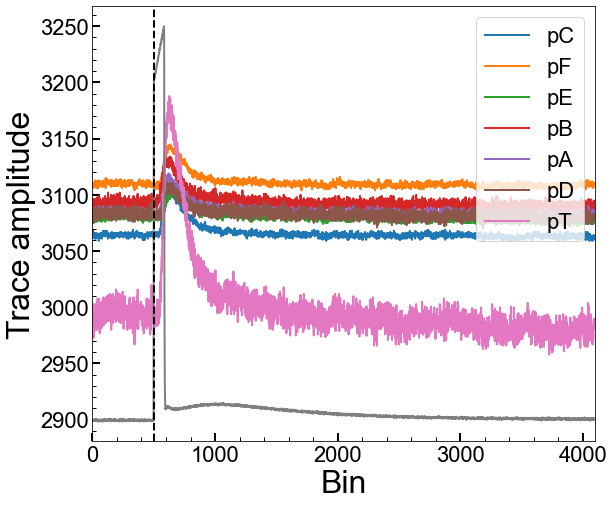

72210262224
730103
[3055 3053 3055 ... 3053 3056 3053]


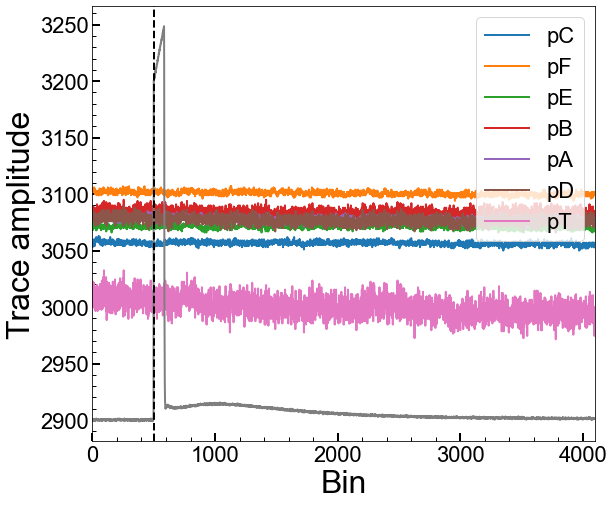

72210262224
730104
[3209 3211 3210 ... 3122 3122 3123]


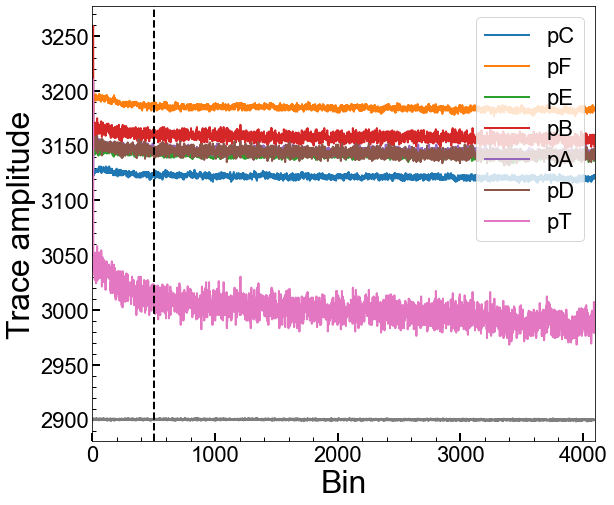

In [4]:
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      
    
     
      print(ser)
      print(ev)
      fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
      ax1 = axes
      print(exampleObj['Z1']['PA'][ser,ev])
      shownpulses=0

      #plt.subplot(8,12)
      if(not pa.isRailed(exampleObj['Z1']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PA'][ser,ev],label="pC") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z1']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PB'][ser,ev],label="pF")
      if(not pa.isRailed(exampleObj['Z1']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PD'][ser,ev],label="pE")
      if(not pa.isRailed(exampleObj['Z3']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PA'][ser,ev],label="pB") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z3']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PB'][ser,ev],label="pA")
      if(not pa.isRailed(exampleObj['Z3']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PD'][ser,ev],label="pD")

      if(shownpulses>0):
        ax1.plot(pa.getPTPulse(exampleObj,ser,ev)+3000,label="pT")

      ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
      #plt.title('PA')
      ax1.legend(loc=1,prop={'size':22})
      ax1.set_xlim(0,4096)
      ax1.set_xlabel('Bin')
      ax1.set_ylabel('Trace amplitude')
      plt.axvline(x=500,color='k',linestyle="--")

      #plt.suptitle('Event 0 on Z1 PA Channels')
      if(shownpulses>0):
        plt.show()